In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
class MF():
    
    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        #self.P = np.random.normal(size=(self.num_users, self.K))
       #self.Q = np.random.normal(size=(self.num_items, self.K))
        self.P = np.random.normal(scale=1.0/self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1.0/self.K, size=(self.num_items, self.K))

        print()
        print("matrix P")
        print(self.P)
        print()
        print("matrix Q")
        print(self.Q)
        print()
         
        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        print()
        print("Overall Bias")
        print(self.b)
        
        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
              for j in range(self.num_items)
                  if self.R[i, j] > 0]
        # Perform stochastic gradient descent for number of iterations
        # print(self.samples)
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            print()
            print("Training_process")
            print(training_process)
            if (i+1) % 10 == 0:
               print("Iteration: %d ; error = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        print()
        print("SSE = ")
        print(np.sqrt(error))
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            #print(prediction)
            e = (r - prediction)
            #print(e , r, prediction)
            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            # Update user and item latent feature matrices
            #print("before update")
            #print(i , j)
            #print(self.P[i, :])
            #print(self.Q[j, :])
            #print()
            self.P[i, :] += (self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:]))
            self.Q[j, :] += (self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:]))
            #print("After update")
            #print(self.P[i, :])
           # print(self.Q[j, :])
           # print()

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        #print(prediction , i, j)
        return prediction
    
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [6]:
df_1  = pd.read_csv("SVD_Data_1.csv")

In [8]:
df_1.head()

,Basic_Stats_score,Inferential_Stats_score,Linear_Reg_score,Logistic_Reg_score,DT_score,NB_score,SVM_score,KM_Clustering_score
0,8,4,9,9,6,6,8,9
1,6,5,2,2,3,4,4,3
2,5,3,4,4,4,6,5,4
3,8,0,3,3,6,5,4,3
4,0,0,0,0,0,0,0,0


In [9]:
R=np.array(df_1 , dtype='int')
#A = np.array([10],dtype='int64')

In [10]:

mf = MF(R, K=10, alpha=0.1, beta=0.1, iterations=15)
training_process = mf.train()

print()
print("P x Q:")
print(mf.full_matrix())
print()
print("Global bias:")
print(mf.b)
print()
print("User bias:")
print(mf.b_u)
print()
print("Item bias:")
print(mf.b_i)
print(R)



matrix P
[[  8.96503116e-02   2.98661588e-02  -3.17415512e-02   7.73105698e-02
   -1.74423625e-01   2.35102036e-01  -1.24802387e-01   7.39783605e-02
   -1.87806849e-01  -2.20416821e-02]
 [  1.11574128e-01   2.16548657e-02  -2.99891889e-02   1.16466271e-01
    4.03464242e-02   5.43787649e-02  -1.08402494e-01   1.03138005e-01
    1.02066361e-01   5.59417065e-02]
 [  7.87811638e-03   4.17990541e-02   1.13716502e-01   1.54179335e-01
    5.22704870e-02  -7.88452786e-02   1.31687768e-01  -2.07820295e-01
   -1.49289516e-01  -9.10095311e-02]
 [  8.82609731e-02  -4.97369039e-02  -2.29252435e-03   1.23961259e-01
   -2.62128918e-01  -3.42109245e-03  -8.29017967e-02  -4.91651612e-02
    1.29661444e-01   1.05361464e-01]
 [  8.10710714e-02  -5.91191574e-02   7.97600055e-02   6.05490015e-02
    5.91351526e-02  -6.93047372e-02   4.37193341e-02  -2.21724178e-01
   -1.38383542e-01  -3.12051603e-02]
 [  1.89095816e-02   9.45733052e-02   5.69685469e-02  -3.15492479e-02
    7.73022497e-02   4.36237138e-02

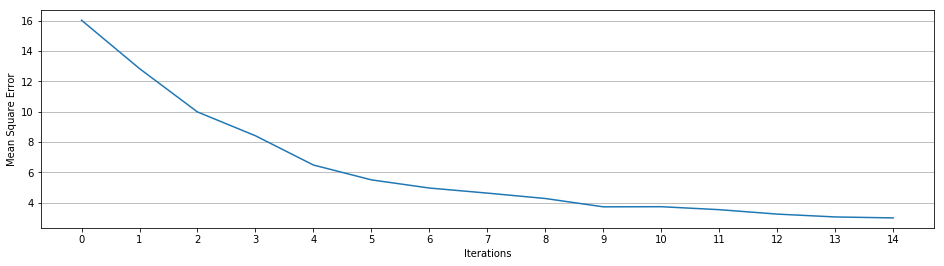

In [11]:
x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")